<a href="https://colab.research.google.com/github/anandramm/Machine_learning-/blob/master/KC_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import The Required Libraries for Date Pre Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the Data 

In [2]:
kc_house_df=pd.read_csv('/content/kc_house_data.csv')
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


See The Statistical Analysis Of Pre loaded Data

In [3]:
kc_house_df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Check For any Missing Values

In [4]:
kc_house_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


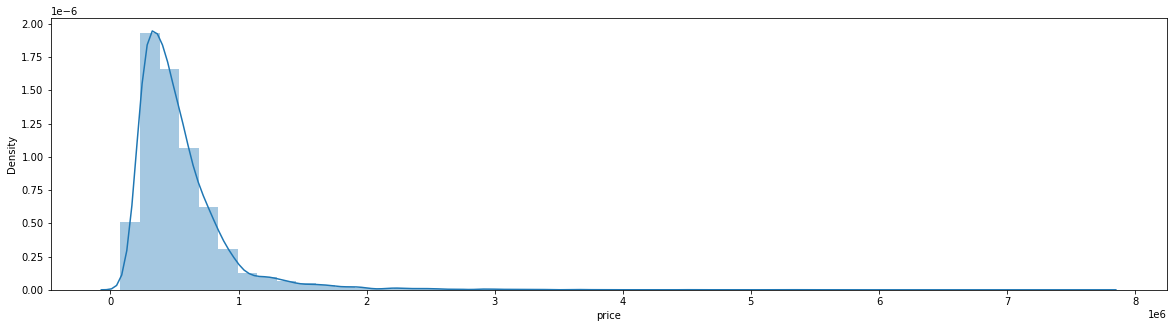

In [5]:
plt.figure(figsize=(20,5))
sns.distplot(kc_house_df.price)
plt.show()

In [6]:
kc_house_df.price>2000000

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: price, Length: 21597, dtype: bool

Check The Co- Relation Values Of The Features

In [7]:
kc_house_df.corr().price.sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

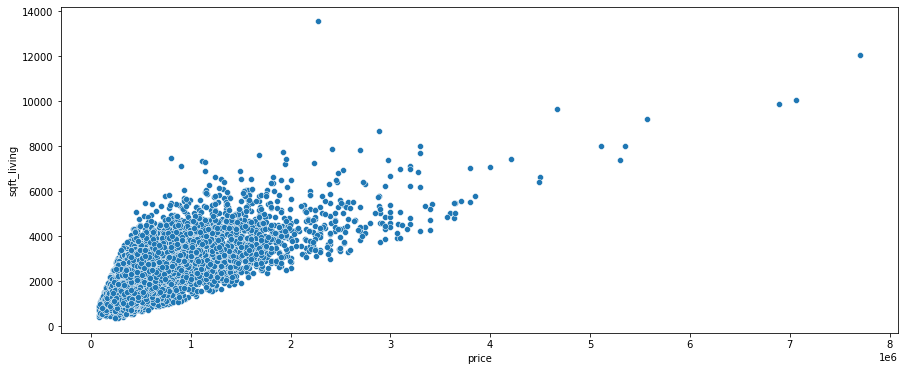

In [8]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='price',y='sqft_living',data=kc_house_df)

In [9]:
main_data=kc_house_df.sort_values('price',ascending=False).iloc[216:]

In [10]:
main_data.sort_values('price',ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


Drop Unnecessary Parameters and Modify the Date Format from String to Date time

In [11]:
kc_house_df.drop('id',axis=1,inplace=True)
kc_house_df['date']=pd.to_datetime(kc_house_df['date'])
kc_house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
kc_house_df['year']=kc_house_df['date'].apply(lambda date:date.year)
kc_house_df['month']=kc_house_df['date'].apply(lambda date:date.month)
kc_house_df['day']=kc_house_df['date'].apply(lambda date:date.day)
kc_house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


Dropping Unnecessary Features

In [13]:
kc_house_df.drop(['date','zipcode'],axis=1,inplace=True)

Seperating the Targeted Features

In [14]:
X=kc_house_df.drop('price',axis=1).values
y=kc_house_df['price'].values

In [15]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 2.014e+03, 1.000e+01,
        1.300e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 2.014e+03, 1.200e+01,
        9.000e+00],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 2.015e+03, 2.000e+00,
        2.500e+01],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.014e+03, 6.000e+00,
        2.300e+01],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 2.015e+03, 1.000e+00,
        1.600e+01],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.014e+03, 1.000e+01,
        1.500e+01]])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

Normalizing Data

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [18]:
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

Using Tensorflow For Deep Learning Regression

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Check the Number OF neurons Needed For Training the Model

In [21]:
X_train.shape

(15117, 20)

In [22]:
model=Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

#Output Layer
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [24]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400,verbose=1)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 31774918656.0000 - val_loss: 30388131840.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 31754758144.0000 - val_loss: 30375837696.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 31729991680.0000 - val_loss: 30356529152.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 31747915776.0000 - val_loss: 30359261184.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 31731212288.0000 - val_loss: 30351529984.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 31727773696.0000 - val_loss: 30383212544.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 31747569664.0000 - val_loss: 30338543616.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 31706523648.0000 - val_loss: 30344595456.0000
Epoch 9/400
119/119 [===========

In [29]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,3.177492e+10,3.038813e+10
1,3.175476e+10,3.037584e+10
2,3.172999e+10,3.035653e+10
3,3.174792e+10,3.035926e+10
4,3.173121e+10,3.035153e+10


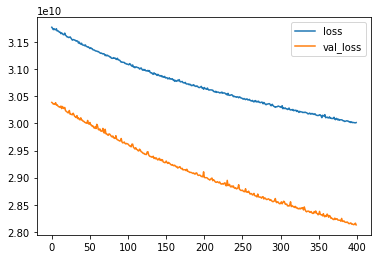

In [30]:
losses.plot()

In [33]:
predictions=model.predict(X_test)
predictions

array([[392764.44],
       [585242.7 ],
       [560388.  ],
       ...,
       [380903.8 ],
       [556701.7 ],
       [682340.3 ]], dtype=float32)

Evaluavating The Models

In [40]:
from sklearn.metrics import mean_squared_error,explained_variance_score

In [37]:
np.sqrt(mean_squared_error(y_test,predictions))

167712.32532323597

In [41]:
explained_variance_score(y_test,predictions)

0.7879080149825112